<a href="https://colab.research.google.com/github/pranscript/neural_jupyter/blob/master/MNIST%20with%20comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# magic function to initialize matplotlib in jupyter. It renders the figure in notebook
# this sets the config to display retina quality graphs if screen supports

%matplotlib inline                                               
%config InlineBackend.figure_format = 'retina'                   

import numpy as np
import torch

import matplotlib.pyplot as plt                                                  
from torchvision import datasets, transforms                      # imports 'datasets' already available to us through torchvision. 'Transforms' are common image 
from torch import nn                                              # transformations functions available to us. 'Torchvision' consists of these popular datasets,   
import torch.nn.functional as F                                   # model architectures and common image transformations. 
from torch import optim                                           # 'nn' is neural network used to make network models easily. 'optim' has optimization algorithms

In [0]:

# All transforms are clubbed together with 'compose'. All transforms in 'compose' is applied to input one by one.
# toTensor() converts to tensor
# normalization is done to bring all values in a fixed range proportionally. (image = (image - mean) / std). This brings value between [-1 to 1]
# For grayscale image, only one channel is there so 1 mean and 1 std value is passed.
# For RGB image, 3 mean and 3 std values are passed since it has 3 channels.

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# 'download=true' downloads the dataset, 'train=true' creates dataset from training otherwise from test.
# dataloader provides an batch loading function for dataset. 'batch_size' set no. of samples per batch to load. 'Shuffle=true' shuffles data every epoch.
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
# input layers, hidden layers and output layers are defined. 784 will get mapped to 128 hidden layers. 128 to 64, then 64 to 10.
input_size = 784                                                    
hidden_sizes = [128, 64]
output_size = 10

# Sequentially all the functions will be applied to the input
# Weights and bias are automatically created. You can manually set weights and bias
# model.fc1.bias.data.fill_(0) to fill bias
# print('Initial weights - ', model[0].weight)
# logsoftmax function has dim=1 to sum across columns
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('logsoftmax', nn.LogSoftmax(dim=1))]))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
print(model)

images, labels = next(iter(trainloader))

# tensor is converted to numpy array
# squeeze() removes all single dimensional entries from its shape if axis not mentioned.
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

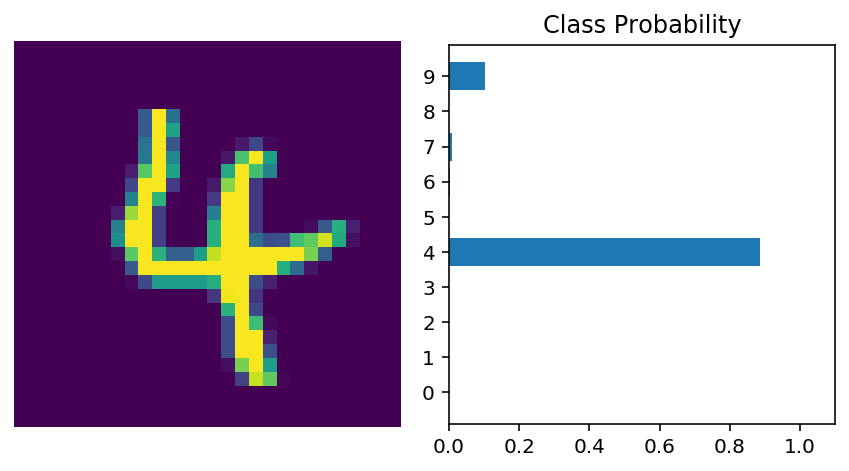

In [49]:
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

img = img.view(1, 28, 28)
ps = ps.data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()